# MLE in python

Based on code from: https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

In [1]:
from scipy.stats import norm
import numpy as np

Let's assume we have a linear regression model. We need to estimate a parameter from a model. We want to use observed data x to create the model's parameters θ. 

But how do we actually estimate the paramters θ?

For example, say we are sampling a random variable X (normally distributed with mean mu and sd). Our goal is to find estimates of mu and sd from our smaple which represents the true X, not just our samples. 

Consider when you’re doing a linear regression, and your model estimates the coefficients for X on the dependent variable y. How do we maximize the likelihood (probability) our estimator θ is from the true X? And, once you have the sample value how do you know it is correct?


## Estimating Our Parameters

Assuming we are using a Normal Distribution, we can use the PDF to get the probability that a given sample x is from our random variable X, when the true parameters of the distribution are mu and sd. (Here mu is the mean and sd is the standard deviation).

Let's look at a few examples. 

Let's say our sample is 3. What is the probability it comes from a distribution of mu = 3 and sd = 1?

We can use the norm.pdf function that we saw last time in class.

In [2]:
norm.pdf(3, 3, 1)

0.3989422804014327

What is the probability that the sample came from a distribution with mu = 7 and sd = 2?

In [3]:
norm.pdf(3, 7, 2)

0.02699548325659403

**Question:** So we see that it is much more likely that of our sample 3 came from the first distribution than the second distribution. How can we tell this is the case based on the probabiliites generated above?

**ANSWER:** Since the decimal (relative likelihood) value returned from the first call of norm.pdf is greater than the value returned in the second call, we know that the value 3 has a higher relative likelihood of being from the first distribution.

**Question:** Assuming we still have a sample of 3, how can we modify the mu and sd in order to generate a distribution X with the probability that our sample came from X is greater than 0.5? (i.e. p(3,mu,sigma) > 0.5)? 

In [4]:
# ANSWER: {Input your answer here!!! 
#         Use the norm.pdf function to show your mu and sd 
#         produce a probablity > 0.5}
norm.pdf(3, 3, .75)


0.5319230405352436

**Question:** What mu and sd will produce a probability > 0.75?

In [5]:
# ANSWER: {Input your answer here!!! 
#         Use the norm.pdf function to show your mu and sd 
#         produce a probablity > 0.75}
norm.pdf(3, 3, .5)


0.7978845608028654

**Question:** What mu and sd will produce a probability < 0.01?

In [6]:
# ANSWER: {Input your answer here!!! 
#         Use the norm.pdf function to show your mu and sd 
#         produce a probablity < 0.01}
norm.pdf(3, 1, .7)


0.009620142107471776

## Likelihood of Many Samples

What happens if we have a bunch of points we want to estimate?

Let's assume we get a bunch of samples from X which we know to come from some normal distribution, and all are mutually independent from each other. If this is the case, the total probability of observing all of the data is the product of obtaining each data point individually. This just makes the maths easier.

So if we want to see the probability of 2 and 6 are drawn from a distribution with mu = 4and sigma = 1 we get:

In [7]:
norm.pdf(2, 4, 1)*norm.pdf(6, 4, 1)

0.0029150244650281948

What if we have even more than two samples?

Consider this sample: x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] and let’s compare these values to both PDF ~ N(5, 3) and PDF ~ N(7, 4). Our sample could be drawn from a variable that comes from these distributions, so let’s take a look.

/home/nate/anaconda3/envs/cs791/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/nate/anaconda3/envs/cs791/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


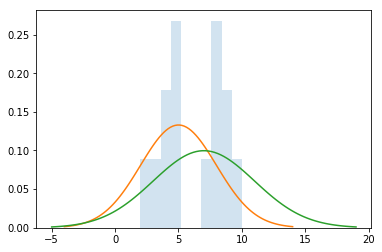

In [8]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline  

import math

x = np.array([4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9])
a = np.histogram(x)

# plot the data themselves
plt.hist(x, density=True, histtype='stepfilled', alpha=0.2)

# plot the first candidate distribution
mu = 5
variance = 9
sd = math.sqrt(variance)
d1 = np.linspace(mu - 3*sd, mu + 3*sd, 100)
plt.plot(d1,mlab.normpdf(d1, mu, sd))

# plot the second candidate distribution
mu = 7
variance = 16
sd = math.sqrt(variance)
d2 = np.linspace(mu - 3*sd, mu + 3*sd, 100)
plt.plot(d2,mlab.normpdf(d2, mu, sd))


plt.show()


It seems quite likely our samples come from either of these distributions. But what is actually correct?

So we want to find p(2, 3, 4, 5, 7, 8, 9, 10; mu, sd). The probability these samples come from a normal distribution with mu and sd. But we don’t know mu and sd, so we need to estimate them.

We do this through maximum likelihood estimation (MLE), to specify a distributions of unknown parameters, then using your data to pull out the actual parameter values.

Our θ is a parameter which estimates x = [2, 3, 4, 5, 7, 8, 9, 10] which we are assuming comes from a normal distribution PDF shown below.

We want to maximize the likelihood our parameter θ comes from this distribution. To make things simpler we’re going to take the log of the equation. Remember how I said above our parameter x was likely to appear in a distribution with certain parameters? Now we can call this our likelihood equation, and when we take the log of the equation PDF equation, we get the log likelihood as we saw in the MLE criterion from today's lecture. For our example here, our likelihood is:

log(f(xi;mu,sd^2) = -(n/2)log(2π) - (n/2)log(sd^2) - (1/(2sd^2))(sum(xi-mu)^2)



Let's compare our x values to the previous two distributions we think it might be drawn from.

In [9]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=4):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print( "The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print( "The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(x)


The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 4 is: -35.1170


**Question:** Based on the log likelihoods above, which distribution do we believe our sample came from?

**ANSWER:** We believe or sample came from the distribution with mu = 5 and sd = 3

Let's take a look at how we can view this graphically.

We want to plot a log likelihood for possible values of mu and sd. Below we have fixed sd at 3.0 while our guess for mu are { mu ∈ R| x ≥ 2 and x ≤ 10}, and will be plotted on the x axis.

We can see the max of our likelihood function occurs around 6.2. However, as we change the estimate for sd — as you will do below — the max of our function will fluctuate. Our goal will be the find the values of mu and sd, that maximize our likelihood function.

The max LL for sd 3.0 is -32.82


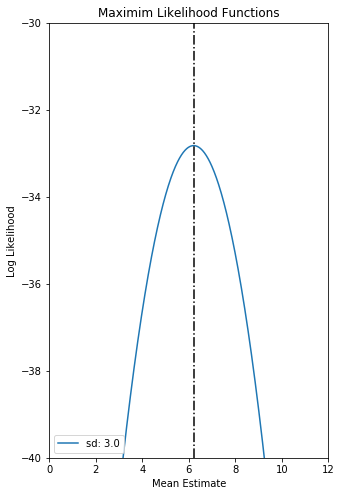

In [44]:
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd = 3.0
    max_val = max_val_location = None

    ll_array = []       
    for j in mu_set:
        temp_mm = 0

        for k in x:
            temp_mm += np.log(norm.pdf(k, j, sd)) # The LL function
        ll_array.append(temp_mm)

        if (max_val is None):
            max_val = max(ll_array)
        elif max(ll_array) > max_val:
            max_val = max(ll_array)
            max_val_location = j

    # Plot the results
    plt.plot(mu_set, ll_array, label="sd: 3.0")

    print( "The max LL for sd 3.0 is %.2f" % (max(ll_array))   )
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')

    plt.show()
        
plot_ll(x);



Now we want to substitute θ in for mu and sd in our likelihood function. Let’s call them θ_mu and θ_sd.

To maximize our equation with respect to each of our parameters, we need to take the derivative and set the equation to zero.

First, let’s estimate θ_mu from our Log Likelihood Equation above:

dx/dθ_mu = 0 => θ_mu = mu = (sum of xi for i = 1...n ) / n

Now we can be certain the maximum likelihood estimate for θ_mu is the sum of our observations, divided by the number of observations. And let’s do the same for θ_sd.

dx/dθ_sd = 0 => θ_sd = sd^2 = [sum of (xi - mu)^2 for i = 1...n] / n

And, now we have our maximum likelihood estimate for θ_sd. Great! Now we know how to estimate both these parameters from the observations we have.

Let’s look at the visualization of how the MLE for θ_mu and θ_sd is determined.

**Question:** Extend the above plotting function to plot lines representing the likelihood function for a set of sd's in a single figure (instead of just a single sd). To illustrate your plot words, generate a plot showing the MLE using the following set of sd's: .5, 1, 1.5, 2.5, 3, 3.5

ValueError: shape mismatch: objects cannot be broadcast to a single shape

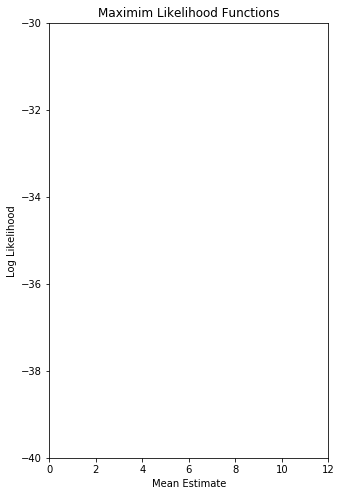

In [48]:
# ANSWER: {Input your answer here!!! 
#          Extend the plotting code and then generate the required plot}
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = np.array([.5, 1, 1.5, 2.5, 3, 3.5])
    max_val = max_val_location = []
    
    ll_results = []
    ll_array = []
    for s in sd_set:
        for j in mu_set:
            temp_mm = 0
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, s)) # The LL function
            ll_array.append(temp_mm)
        ll_results.append(ll_array)
        ll_array = []

#             if (len(max_val) is 0):
#                 max_val = max(ll_array)
#             elif max(ll_array) > max_val:
#                 max_val = max(ll_array)
#                 max_val_location = j

    # Plot the results
    count = 0
    for array in ll_results:
        plt.plot(mu_set, array, label=str(sd_set[count]))

#         print( "The max LL for sd is %.2f" % (max(ll_array))   )
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

        plt.show()
        count = count + 1
        
plot_ll(x);

In your answer above, each line plots a different likelihood function for a different value of sd. Each maximum is clustered around the same single point 6.2 as it was in our sd = 3.0 example above. From this new plot, we can see how changing our estimate for θ_sd changes which likelihood function provides our maximum value. 

**Question:** From your plot above, which likelihood function provied our maximum value? (i.e. assuming our θ_mu = 6.2, which θ_sd provided the max log likelihood?) 


**ANSWER:** {Input your answer here!!! In plain text}

Now we understand what is meant by maximizing the likelihood function. But let’s confirm the exact values, rather than rough estimates. If you want a more detailed understanding of why the likelihood functions are convex, here is a good Cross Validated post: https://stats.stackexchange.com/questions/260719/convexity-linearity-and-their-combination-for-mle.

We can use the equations we derived from the first order derivatives above to get those estimates as well:

**Question:** Using the equations for θ_mu and θ_sd above, calculate the θ_mu and θ_sd that maximize our likelihood function. How do these values compare to your estimates from the previous question?  Finally, use np.mean(x) and np.std(x) to verify that your values are correct.

In [78]:
# ANSWER: {Input your answer here!!! 
#         For the comparision part, put your answer as a comment
#         below the math used to calcaulate your answer.}

**Question:** Now that we have estimates for mu and sd of our distribution, modify the plotting code below to plot this distribution alongside the potenial distributions we looked at before. 

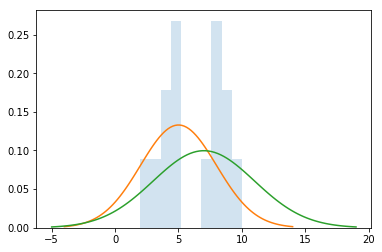

In [79]:
# ANSWER: {Input your answer here!!! 
#         MODFIY the code below to plot the new distribution as well}

from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import math

x = np.array([4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9])
a = np.histogram(x)

# plot the data themselves
plt.hist(x, density=True, histtype='stepfilled', alpha=0.2)

# plot the first candidate distribution
mu = 5
variance = 9
sd = math.sqrt(variance)
d1 = np.linspace(mu - 3*sd, mu + 3*sd, 100)
plt.plot(d1,mlab.normpdf(d1, mu, sd))

# plot the second candidate distribution
mu = 7
variance = 16
sd = math.sqrt(variance)
d2 = np.linspace(mu - 3*sd, mu + 3*sd, 100)
plt.plot(d2,mlab.normpdf(d2, mu, sd))


plt.show()

**Question:** What can you conclude about how well our points fit the potenial distributions?

**ANSWER:** {Input your answer here!!! In plain text}

## THE END!